<a href="https://colab.research.google.com/github/Akhilauggina/ml_pro/blob/main/Amazon_Product_Reviews_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data=pd.read_csv('/content/Amazon-Product-Reviews-Sentiment-Analysis-in-Python-Dataset.csv')


In [ ]:
data.head()

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [ ]:
data.dropna(inplace=True)

In [ ]:
data

,Review
0,Fast shipping product cheaply made I brought g...
1,This case takes long ship even worth DONT BUY!!!!
2,Good droids. Not good iPhones. You cannot use ...
3,The cable compatible macbook iphone. Also conn...
4,The case nice glow light. I'm disappointed pro...
...,...
24995,These cables (lightning) far superior cables m...
24996,This unit performs exactly advertised. I use c...
24997,"I key cut local hardware store cut free, progr..."
24998,I love case I ordered amazon. It color looked ...


In [ ]:
# Reload the data to ensure 'Review' and 'Sentiment' columns are present
data = pd.read_csv('/content/Amazon-Product-Reviews-Sentiment-Analysis-in-Python-Dataset.csv')

# Drop rows with any NaN values, as done previously
data.dropna(inplace=True)

# Now, remap the 'Sentiment' column to binary (0 or 1)
# Assuming the original 'Sentiment' values ranged from 1 to 5, where <=2 is negative/neutral (0) and >2 is positive (1).
data['Sentiment'] = data['Sentiment'].apply(lambda x: 0 if x <= 2 else 1)


In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(data['Review'])
y = data['Sentiment']

In [ ]:
print("Shape of TF-IDF features (X):", X.shape)
print("Shape of sentiment labels (y):", y.shape)

Shape of TF-IDF features (X): (24999, 5000)
Shape of sentiment labels (y): (24999,)


In [ ]:
stp_words=stopwords.words('english')
def clean_review(review):
  cleanreview=" ".join(word for word in review.split() if word not in stp_words)
  return cleanreview
data['Review']=data['Review'].apply(clean_review)

In [ ]:
data.head()

,Review,Sentiment
0,Fast shipping product cheaply made I brought g...,0
1,This case takes long ship even worth DONT BUY!!!!,0
2,Good droids. Not good iPhones. You cannot use ...,0
3,The cable compatible macbook iphone. Also conn...,0
4,The case nice glow light. I'm disappointed pro...,0


In [ ]:
data['Sentiment'].value_counts()

,count
Sentiment,
0,19999
1,5000


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (19999, 5000)
Shape of X_test: (5000, 5000)
Shape of y_train: (19999,)
Shape of y_test: (5000,)


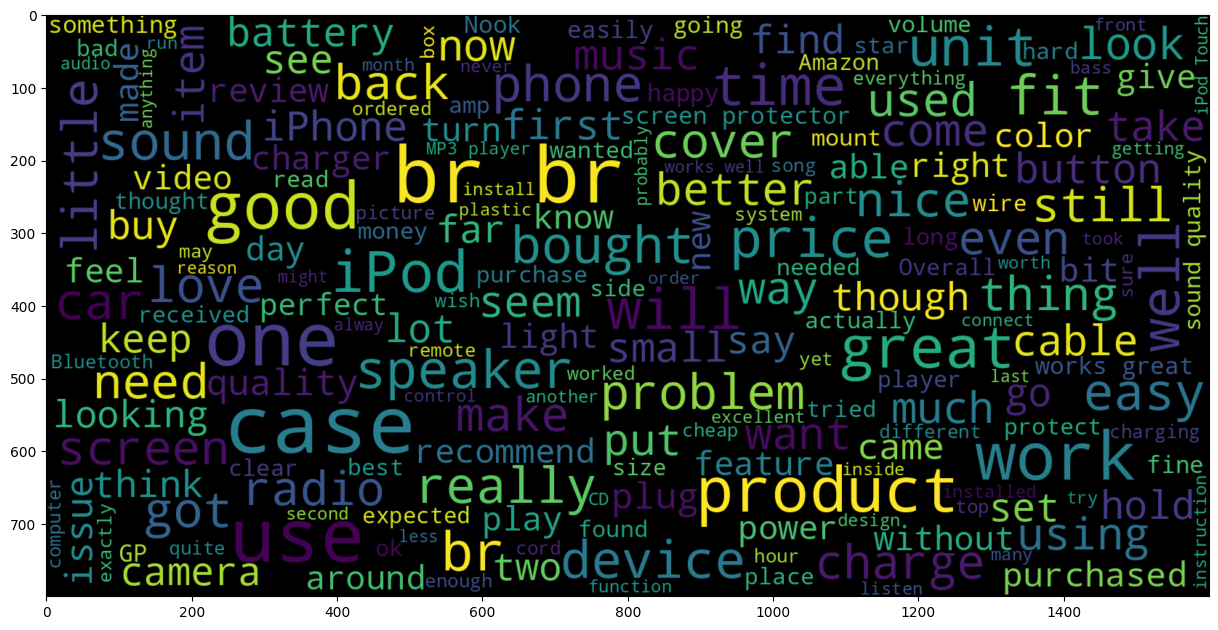

In [ ]:
words=' '.join(word for word in data['Review'][data['Sentiment']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(words),interpolation='bilinear')
plt.axis('on')
plt.show()

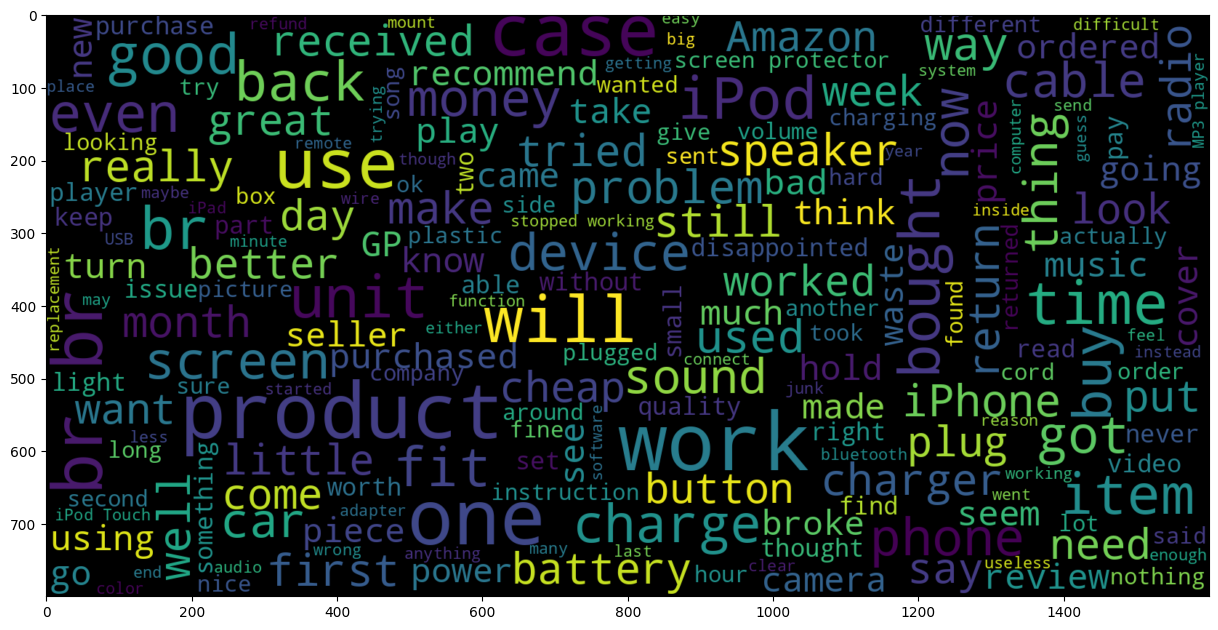

In [ ]:
words=' '.join(word for word in data['Review'][data['Sentiment']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(words),interpolation='bilinear')
plt.axis('on')
plt.show()

In [ ]:
cv=TfidfVectorizer(max_features=5000)
x=cv.fit_transform(data['Review']).toarray()

In [ ]:
x

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.14044394, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
y=data['Sentiment']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model=LogisticRegression()

#Model fitting
model.fit(x_train,y_train)

#testing the model
pred=model.predict(x_test)

#model accuracy
print(accuracy_score(y_test,pred))



0.811
